# Actually, Marty didn’t go Back To The Future!
## Graphing the train sequence of BTTF3

This is the companion notebook to the blog post: http://blog.francoismaillet.com/marty-didnt-go-back-to-the-future.

In [440]:
%matplotlib inline

In [470]:
import pandas
import numpy as np
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt

import csv

plt.rcParams['figure.figsize'] = (8.0, 5.0)

## Load the data from the `events.csv` file.

In [442]:
def time_str_to_secs(x):
    hr, mins, secs = map(int, x.split(":"))
    return (secs + (60 * mins) + (60*60*hr)) / 60.0

In [443]:
events = pandas.DataFrame.from_csv("events.csv", parse_dates=False).reset_index()
events["minutes"] = [time_str_to_secs(x) for x in events["time"]]
events["mins_seq"] = events["minutes"] - min(events["minutes"])

In [592]:
events.head()

,time,event,value,comment,minutes,mins_seq
0,1:34:39,boiler,0,NaN,94.650000,0.000000
1,1:34:39,mph,0,starting slowly,94.650000,0.000000
2,1:35:24,mph,25,cruising steady,95.400000,0.750000
3,1:35:41,boiler,600,NaN,95.683333,1.033333
4,1:35:51,boiler,750,NaN,95.850000,1.200000


# Graphing the events

Start by simply looking at the graph of what happened...

In [445]:
events[events["event"] == "log"]

,time,event,value,comment,minutes,mins_seq
6,1:36:08,log,green,NaN,96.133333,1.483333
10,1:36:54,log,yellow,NaN,96.900000,2.250000
27,1:39:49,log,red,NaN,99.816667,5.166667


In [446]:
events[events["event"] == "landmark"]

,time,event,value,comment,minutes,mins_seq
16,1:37:59,landmark,clara,NaN,97.983333,3.333333
17,1:38:24,landmark,windmill,NaN,98.400000,3.750000
33,1:40:41,landmark,track ends in 1/4 mile sign,NaN,100.683333,6.033333
40,1:41:47,landmark,THE FUTURE,NaN,101.783333,7.133333


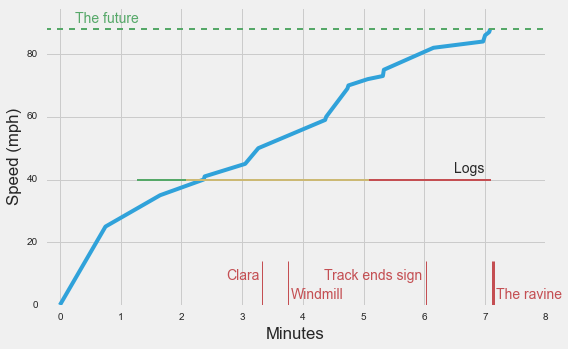

In [593]:
with plt.style.context('fivethirtyeight'):
    # plot the speed
    plt.plot(list(events[events["event"] == "mph"]["mins_seq"]),
             list(events[events["event"] == "mph"]["value"]))
    plt.xlabel("Minutes")
    plt.ylabel("Speed (mph)")
    
    # horizontal line showing where the future is
    plt.axhline(y=88, linewidth=2, color='g', linestyle="--")
    plt.text(0.25, 90, "The future", color='g')

    xmin = -0.25
    xmax = 8.0
    
    # horizontal lines showing when the 3 logs catch fire
    plt.text(6.5, 42, "Logs")
    plt.axhline(y=40, linewidth=2, color='g', xmin=1.48/xmax, xmax=2.25/xmax)
    plt.axhline(y=40, linewidth=2, color='y', xmin=2.25/xmax, xmax=5.17/xmax)
    plt.axhline(y=40, linewidth=2, color='r', xmin=5.17/xmax, xmax=7.13/xmax)
    
    # landmarks along the track
    plt.axvline(x=3.33, ymin=0, ymax=0.15, linewidth=1, color='r')
    plt.text(2.75, 8, "Clara", color='r')
    
    plt.axvline(x=3.75, ymin=0, ymax=0.15, linewidth=1, color='r')
    plt.text(3.8, 2, "Windmill", color='r')
    
    plt.axvline(x=6.03, ymin=0, ymax=0.15, linewidth=1, color='r')
    plt.text(4.35, 8, "Track ends sign", color='r')
    
    plt.axvline(x=7.13, ymin=0, ymax=0.15, linewidth=3, color='r')
    plt.text(7.18, 2, "The ravine", color='r')
    
    plt.axis([xmin,xmax,-0.25,95])
  

# Computing the distance they travelled

What we're wondering is if they had enough tracks to get to 88 mph before falling in the ravine. Let's calculate the distance.

In [448]:
tpoint = list(events[events["event"] == "mph"]["mins_seq"])
spd = map(float, events[events["event"] == "mph"]["value"])

distance = 0
df_construct = []
for idx in xrange(len(tpoint)-1):
    fit = stats.linregress([tpoint[idx], tpoint[idx+1]], [spd[idx], spd[idx+1]])
    
    sub_distance = 0
    for tidx in np.arange(tpoint[idx], tpoint[idx+1], 0.01):
        # what speed are we going at now?
        speed_mph = fit.slope * tidx + fit.intercept
        sub_distance += speed_mph * (0.01 / 60.0)
        
        df_construct.append([tidx, distance + sub_distance, speed_mph, fit.slope])
    
    print "time: %0.2f minutes with speeds from %0.2f to %0.2f" % (
        (tpoint[idx+1] - tpoint[idx]),  float(spd[idx]), float(spd[idx+1]))
    print " travelled %0.2f miles " % sub_distance
    print " slope %0.2f " % fit.slope
    distance += sub_distance

print " ---------- "
print "Distance travelled: %0.2f miles" % distance

distance_dt = pandas.DataFrame(df_construct, columns=["mins_seq", "distance", "speed", "slope"])


time: 0.75 minutes with speeds from 0.00 to 25.00
 travelled 0.15 miles 
 slope 33.33 
time: 0.90 minutes with speeds from 25.00 to 35.00
 travelled 0.45 miles 
 slope 11.11 
time: 0.72 minutes with speeds from 35.00 to 40.00
 travelled 0.45 miles 
 slope 6.98 
time: 0.02 minutes with speeds from 40.00 to 41.00
 travelled 0.01 miles 
 slope 60.00 
time: 0.67 minutes with speeds from 41.00 to 45.00
 travelled 0.48 miles 
 slope 6.00 
time: 0.22 minutes with speeds from 45.00 to 50.00
 travelled 0.17 miles 
 slope 23.08 
time: 1.10 minutes with speeds from 50.00 to 59.00
 travelled 1.00 miles 
 slope 8.18 
time: 0.02 minutes with speeds from 59.00 to 60.00
 travelled 0.02 miles 
 slope 60.00 
time: 0.35 minutes with speeds from 60.00 to 69.00
 travelled 0.39 miles 
 slope 25.71 
time: 0.02 minutes with speeds from 69.00 to 70.00
 travelled 0.02 miles 
 slope 60.00 
time: 0.32 minutes with speeds from 70.00 to 72.00
 travelled 0.38 miles 
 slope 6.32 
time: 0.25 minutes with speeds from 7

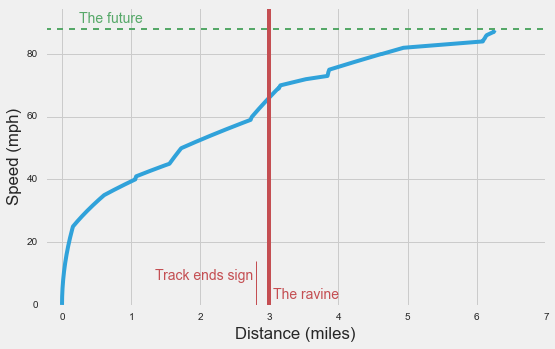

In [578]:
with plt.style.context('fivethirtyeight'):
    plt.plot(distance_dt["distance"], distance_dt["speed"])
    plt.xlabel("Distance (miles)")
    plt.ylabel("Speed (mph)")
    
    plt.axhline(y=88, linewidth=2, color='g', linestyle="--")
    plt.text(0.25, 90, "The future", color='g')   
    
    plt.axvline(x=3, linewidth=4, color='r')
    plt.text(3.05, 2, "The ravine", color='r')
       
    plt.axvline(x=3.05 - 0.25, ymin=0, ymax=0.15, linewidth=1, color='r')
    plt.text(1.34, 8, "Track ends sign", color='r')
    
    plt.axis([-0.25,7,-0.25,95])
    
  

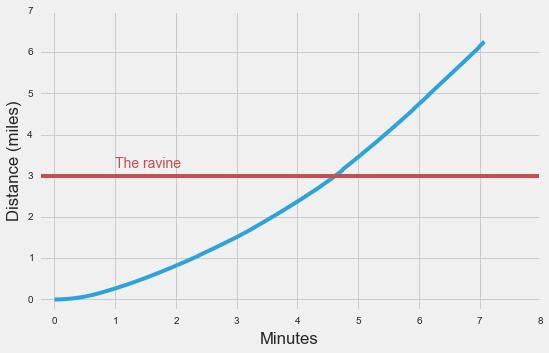

In [580]:
with plt.style.context('fivethirtyeight'):
    plt.plot(distance_dt["mins_seq"], distance_dt["distance"])
    plt.ylabel("Distance (miles)")
    plt.xlabel("Minutes")
    
    plt.axhline(y=3, linewidth=4, color='r')
    plt.text(1, 3.2, "The ravine", color='r')
    
    plt.axis([-0.25,8,-0.25,7])


### Plot the acceleration

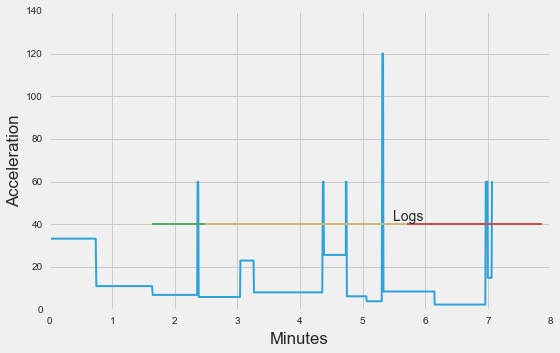

In [600]:
with plt.style.context('fivethirtyeight'):
    plt.plot(distance_dt["mins_seq"], distance_dt["slope"], linewidth=2)
    plt.xlabel("Minutes")
    plt.ylabel("Acceleration")
    
    xmax = 7.25
    
    # horizontal lines showing when the 3 logs catch fire
    plt.text(5.5, 42, "Logs")
    plt.axhline(y=40, linewidth=2, color='g', xmin=1.48/xmax, xmax=2.25/xmax)
    plt.axhline(y=40, linewidth=2, color='y', xmin=2.25/xmax, xmax=5.17/xmax)
    plt.axhline(y=40, linewidth=2, color='r', xmin=5.17/xmax, xmax=7.13/xmax)

    #plt.axis([0,xmax,0,140])
    

# Let's give Doc a hand

We need to be going at 88 mph when reaching 3 miles. let's assume we only have the period from when the green log catches fire.

In [476]:
events[events["value"] == "green"]

,time,event,value,comment,minutes,mins_seq
6,1:36:08,log,green,NaN,96.133333,1.483333


In [488]:
# when did the green log catch fire?
green_catch_fire = distance_dt.ix[(distance_dt.mins_seq - 1.483333).abs().argsort()[0]]
distance_at_green = green_catch_fire.distance
green_catch_fire 

mins_seq     1.480000
distance     0.512519
speed       33.111111
slope       11.111111
Name: 148, dtype: float64

In [490]:
print "At green log ignition..."
print "  Speed: %0.2f mph" % green_catch_fire.speed
print "  Distance: %0.2f miles" % green_catch_fire.distance
print "  Ditance left: %0.2f miles" % (3 - green_catch_fire.distance)

At green log ignition...
  Speed: 33.11 mph
  Distance: 0.51 miles
  Ditance left: 2.49 miles


In [562]:
for accel in np.arange(0, 5, 0.001):
    distance = 0.51
    speed = 33.11
    time = 1.480000
    i = 0
    
    speeds = []
    distances = []
    
    while True:
        i+=1
        time += 0.01
        speed = speed + accel
        distance += speed_mph * (0.01 / 60.0)
        
        speeds.append(speed)
        distances.append(distance)
        
        if distance >= 3:
            break
    
    if speed>=88:
        print "Acceleration of: %0.4f mph/0.6secs" % accel
        print "Distance: %0.2f miles" % distance
        print "Final speed: %0.2f mph" % speed
        print "Final time: %0.2f" % time
        break


Acceleration of: 0.8450 mph/0.6secs
Distance: 3.04 miles
Final speed: 88.03 mph
Final time: 2.13


### Replot the original graphs with the new data

715


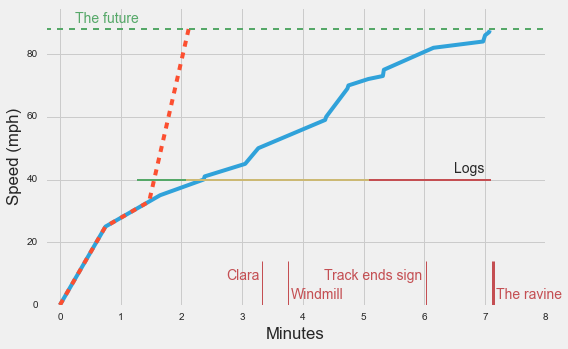

In [556]:
with plt.style.context('fivethirtyeight'):
    # plot the speed
    plt.plot(list(distance_dt["mins_seq"]),
             list(distance_dt["speed"]))
    
    required_speed = list(new_distance_dt[:148]["speed"]) + speeds
    print len(list(distance_dt["mins_seq"]))
    plt.plot(list(distance_dt["mins_seq"])[:len(required_speed)],
             required_speed, linestyle="--")
    plt.xlabel("Minutes")
    plt.ylabel("Speed (mph)")
    
    # horizontal line showing where the future is
    plt.axhline(y=88, linewidth=2, color='g', linestyle="--")
    plt.text(0.25, 90, "The future", color='g')

    xmin = -0.25
    xmax = 8.0
    
    # horizontal lines showing when the 3 logs catch fire
    plt.text(6.5, 42, "Logs")
    plt.axhline(y=40, linewidth=2, color='g', xmin=1.48/xmax, xmax=2.25/xmax)
    plt.axhline(y=40, linewidth=2, color='y', xmin=2.25/xmax, xmax=5.17/xmax)
    plt.axhline(y=40, linewidth=2, color='r', xmin=5.17/xmax, xmax=7.13/xmax)
    
    # landmarks along the track
    plt.axvline(x=3.33, ymin=0, ymax=0.15, linewidth=1, color='r')
    plt.text(2.75, 8, "Clara", color='r')
    
    plt.axvline(x=3.75, ymin=0, ymax=0.15, linewidth=1, color='r')
    plt.text(3.8, 2, "Windmill", color='r')
    
    plt.axvline(x=6.03, ymin=0, ymax=0.15, linewidth=1, color='r')
    plt.text(4.35, 8, "Track ends sign", color='r')
    
    plt.axvline(x=7.13, ymin=0, ymax=0.15, linewidth=3, color='r')
    plt.text(7.18, 2, "The ravine", color='r')
    
    plt.axis([xmin,xmax,-0.25,95])
  

715


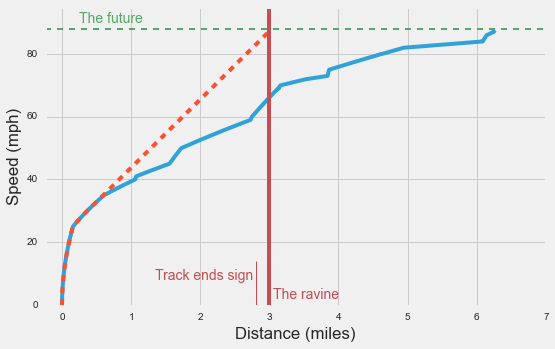

In [557]:
with plt.style.context('fivethirtyeight'):
    plt.plot(distance_dt["distance"], distance_dt["speed"])
    plt.xlabel("Distance (miles)")
    plt.ylabel("Speed (mph)")
    
    required_speed = list(new_distance_dt[:148]["speed"]) + speeds
    required_dist = list(new_distance_dt[:148]["distance"]) + distances
    print len(list(distance_dt["mins_seq"]))
    plt.plot(required_dist,
             required_speed, linestyle="--")

    
    plt.axhline(y=88, linewidth=2, color='g', linestyle="--")
    plt.text(0.25, 90, "The future", color='g')   
    
    plt.axvline(x=3, linewidth=4, color='r')
    plt.text(3.05, 2, "The ravine", color='r')
       
    plt.axvline(x=3.05 - 0.25, ymin=0, ymax=0.15, linewidth=1, color='r')
    plt.text(1.34, 8, "Track ends sign", color='r')
    
    plt.axis([-0.25,7,-0.25,95])
    